# Traitement d'images : filtrage, seuillage, et comptage d'objets avec opencv

Une initiation à la biblithèque opencv 

# Veille technologique: Opencv python

-  Suivre les instructions et faire une recherche selon ce qui est demandé.

## Operations Simples

In [3]:
import cv2
import matplotlib.pyplot as plt

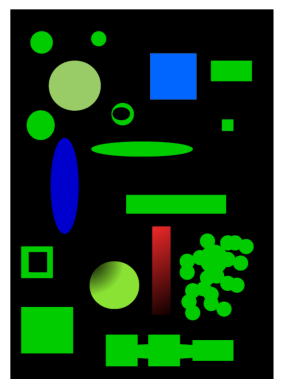

In [4]:
# Lire l'image avec OpenCV
image = cv2.imread('image_01.png')

# Convertir l'image de BGR en RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Afficher l'image avec matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Pour ne pas afficher les axes
plt.show()

In [5]:
# afficher la taille de l'image
# Lire l'image avec OpenCV
image = cv2.imread('image_01.png')

# Afficher la taille de l'image
print(f"Taille de l'image: {image.shape}")


Taille de l'image: (760, 541, 3)


In [6]:
# Coordonnées du pixel
x = 150
y = 100

# Accéder aux valeurs de couleur pour le pixel spécifié
# OpenCV utilise l'ordre BGR par défaut, pas RGB
bleu = image[y, x, 0]
vert = image[y, x, 1]
rouge = image[y, x, 2]

# Afficher les valeurs
print(f"Valeurs de couleur pour le pixel (x={x}, y={y}): Rouge={rouge}, Vert={vert}, Bleu={bleu}")

Valeurs de couleur pour le pixel (x=150, y=100): Rouge=0, Vert=0, Bleu=0


In [7]:
# Crop une partie de l'image (sélectionner une petite partie à partir des coordonnées)
# Définir les coordonnées du coin supérieur gauche et du coin inférieur droit du rectangle de rognage
x_start = 100
y_start = 50
x_end = 200
y_end = 150

# Rogner l'image
cropped = image[y_start:y_end, x_start:x_end]

# Afficher l'image rognée
cv2.imshow("Image Rognee", cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# Redimensionner l'image à 200x200 pixels
resized = cv2.resize(image, (200, 200))

# Afficher l'image redimensionnée
cv2.imshow("Image Redimensionnee", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

# qu'est ce que vous remarquez !!


l'image est étiré, le ratio n'est plus conservé

In [9]:
# Charger l'image
image = cv2.imread('image_01.png')

# Définir la largeur ou la hauteur cible pour le redimensionnement
largeur_cible = 400  # Pour redimensionner par largeur
hauteur_cible = 400  # Pour redimensionner par hauteur

# Obtenir les dimensions originales de l'image
hauteur_originale, largeur_originale = image.shape[:2]

# Calculer le facteur de mise à l'échelle pour la largeur et la hauteur
# Pour conserver le rapport d'aspect, utilisez le même facteur pour fx et fy
facteur_largeur = largeur_cible / largeur_originale
facteur_hauteur = hauteur_cible / hauteur_originale

# Redimensionner l'image par la largeur tout en conservant le rapport d'aspect
image_redimensionnee_largeur = cv2.resize(image, None, fx=facteur_largeur, fy=facteur_largeur, interpolation=cv2.INTER_AREA)

# Redimensionner l'image par la hauteur tout en conservant le rapport d'aspect
image_redimensionnee_hauteur = cv2.resize(image, None, fx=facteur_hauteur, fy=facteur_hauteur, interpolation=cv2.INTER_AREA)

# Afficher les images redimensionnées
cv2.imshow("Image redimensionnee par largeur", image_redimensionnee_largeur)
cv2.imshow("Image redimensionnee par hauteur", image_redimensionnee_hauteur)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [10]:
import imutils
# Charger l'image
image = cv2.imread('image_01.png')

# Tourner l'image de -45 degrés sans tronquage
rotated = imutils.rotate(image, angle=-45)

# Afficher l'image tournée
cv2.imshow("Image tournee avec imutils", rotated)
cv2.waitKey(0)
cv2.destroyAllWindows()

Vous pouvez utiliser la bibliothèque imutils pour faire les rotations et d'autres fonctions facilement. Pour l'instaler: pip install imutils

# Dessiner sur l'image

In [11]:
# Définir les coordonnées du coin supérieur gauche et du coin inférieur droit du rectangle
# (x, y) du coin supérieur gauche et (x + w, y + h) du coin inférieur droit
pt1 = (100, 100)
pt2 = (50, 300)

# Définir la couleur du rectangle en BGR (Bleu, Vert, Rouge) et l'épaisseur de la ligne
couleur = (0, 255, 0)  # Vert
epaisseur = 3  # Pixels

# Dessiner le rectangle sur l'image
cv2.rectangle(rotated, pt1, pt2, couleur, epaisseur)

# Afficher l'image avec le rectangle
cv2.imshow("Image avec rectangle", rotated)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
# Définir les coordonnées du centre du cercle (x, y)
centre = (150, 150)

# Définir le rayon du cercle
rayon = 50

# Définir la couleur du cercle en BGR (Bleu, Vert, Rouge) et l'épaisseur de la ligne
couleur = (255, 0, 0)  # Bleu
epaisseur = 3  # Pixels

# Dessiner le cercle sur l'image
cv2.circle(rotated, centre, rayon, couleur, epaisseur)

# Afficher l'image avec le cercle
cv2.imshow("Image avec cercle", rotated)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Filtrage d'image

* Blur
* Gaussian blur
* Median blur
* Sharpening
* Bilateral blur
* Bilateral filtering

In [13]:
import cv2

# Charger l'image
image_bois = cv2.imread('bois.png')  # Assure-toi que le chemin vers l'image est correct

# Afficher l'image
cv2.imshow("Image Bois", image_bois)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
# Utiliser la méthode "cv2.filter2D" avec un kernel de taille 2
import cv2
import numpy as np

# Charger l'image
image = cv2.imread('bois.png')

# Définir un kernel de taille 2x2
# Ce kernel est juste un exemple. Les valeurs spécifiques dépendront de l'effet désiré.
kernel = np.array([[1, -1],
                   [-1, 1]], dtype=np.float32)

# Appliquer le kernel à l'image en utilisant cv2.filter2D
image_filtree = cv2.filter2D(image, -1, kernel)

# Afficher l'image originale et l'image filtrée
cv2.imshow('Image Originale', image)
cv2.imshow('Image Filtree avec Kernel 2x2', image_filtree)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [15]:
# Appliquer blur avec un kernel de taille 5x5
import cv2
import numpy as np

# Charger l'image
image = cv2.imread('bois.png')

# Vérifier si l'image a été chargée correctement
if image is None:
    print("Erreur : L'image n'a pas pu être chargée. Vérifie le chemin d'accès.")
else:
    # Créer un kernel de taille 5x5 pour le flou
    kernel = np.ones((5, 5), np.float32) / 25

    # Appliquer le kernel à l'image en utilisant cv2.filter2D
    image_floue = cv2.filter2D(image, -1, kernel)

    # Afficher l'image originale et l'image floue
    cv2.imshow('Image Originale', image)
    cv2.imshow('Image Floue avec Kernel 5x5', image_floue)
    cv2.waitKey(0)
    cv2.destroyAllWindows()



In [16]:
image_floue1= cv2.blur(image, (5, 5))
# Afficher l'image originale et l'image floue
cv2.imshow('Image Originale', image_floue1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
# gaussian blur

image_floue_gaussien = cv2.GaussianBlur(image, (5, 5), 0)
cv2.imshow('Image gauss', image_floue_gaussien)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
import cv2

# Charger l'image
image = cv2.imread('bois.png')  # Assure-toi que le chemin vers l'image est correct

# Appliquer un flou médian à l'image
# Utilise un kernel de taille 5. Remarque : la taille doit être un entier impair.
image_floue_median = cv2.medianBlur(image, 5)

# Afficher l'image originale et l'image floutée
cv2.imshow('Image Originale', image)
cv2.imshow('Image avec Flou Médian', image_floue_median)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [1]:
import cv2
import numpy as np

# Charger l'image
image = cv2.imread('bois.png')

# Définir un kernel de sharpening
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])

# Appliquer le kernel à l'image en utilisant cv2.filter2D
image_sharpened = cv2.filter2D(image, -1, kernel_sharpening)

# Afficher l'image originale et l'image accentuée
cv2.imshow('Image Originale', image)
cv2.imshow('Image Accentuée', image_sharpened)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [20]:
import cv2

# Charger l'image
image = cv2.imread('bois.png')

# Appliquer un filtrage bilatéral
# Les paramètres sont : l'image source, le diamètre des pixels voisins pris en compte, sigmaColor, sigmaSpace
image_filtree_bilaterale = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

# Afficher l'image originale et l'image filtrée
cv2.imshow('Image Originale', image)
cv2.imshow('Image avec Filtrage Bilatéral', image_filtree_bilaterale)

cv2.waitKey(0)
cv2.destroyAllWindows()


# Seuillage d'image

En utilisant l'image "sudoku" appliquer:
* Binary Thresholding
* Otsu thresholding
* Adaptive thresholding

In [21]:
# appliquer un seuillage binaire d'un seuil de 127
import cv2

# Charger l'image en niveaux de gris
image = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)

# Seuillage binaire
_, thresh_binary1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

In [22]:
# appliquer un seuillage binaire d'un seuil de 30
_, thresh_binary2 = cv2.threshold(image, 30, 255, cv2.THRESH_BINARY)

In [23]:
# appliquer un seuillage binaire d'un seuil de 240
_, thresh_binary3 = cv2.threshold(image, 240, 255, cv2.THRESH_BINARY)

Qu'est ce que vous remarquez ?!

In [24]:
# appliquer "Otsu" seuillage
# Seuillage d'Otsu
_, thresh_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [25]:
# appliquer "Adaptive threshold"
# Seuillage adaptatif
thresh_adaptatif = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                         cv2.THRESH_BINARY, 11, 2)

In [32]:
# Afficher l'image originale
cv2.imshow('Original', image)

# Afficher l'image avec seuillage binaire
cv2.imshow('Seuillage Binaire1', thresh_binary1)
cv2.imshow('Seuillage Binaire2', thresh_binary2)
cv2.imshow('Seuillage Binaire3', thresh_binary3)
# Afficher l'image avec seuillage d'Otsu
cv2.imshow('Seuillage d\'Otsu', thresh_otsu)

# Afficher l'image avec seuillage adaptatif
cv2.imshow('Seuillage Adaptatif', thresh_adaptatif)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Détection des bords

* Sobel
* Canny

In [2]:
import cv2
import numpy as np

# Charger l'image et convertir en niveaux de gris
image = cv2.imread('sudoku.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer le filtre de Sobel en X et en Y
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Calculer et convertir la magnitude des gradients
magnitude = np.sqrt(sobelx**2 + sobely**2)
magnitude = np.uint8(magnitude)

# Afficher l'image originale et la magnitude des gradients
cv2.imshow('Image Originale', image)
cv2.imshow('Magnitude des Gradients', magnitude)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
# Canny
import cv2

# Charger l'image et convertir en niveaux de gris
image = cv2.imread('sudoku.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer la détection de bords Canny
edges = cv2.Canny(gray, threshold1=50, threshold2=150)

# Afficher l'image originale et les bords détectés
cv2.imshow('Image Originale', image)
cv2.imshow('Bords détectés avec Canny', edges)

cv2.waitKey(0)
cv2.destroyAllWindows()


# Détection des contours

In [4]:
import cv2
import numpy as np

# Charger l'image en niveaux de gris
image = cv2.imread("image_02.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer la détection de bords de Canny
edges = cv2.Canny(gray, 100, 200)

# Trouver les contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dessiner les contours sur l'image originale
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 3)

# Afficher l'image avec les contours
cv2.imshow("Contours", image_with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()


#  Compter des objets

In [5]:
import cv2
import numpy as np

# Charger l'image en niveaux de gris
image = cv2.imread("image_02.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer la détection de bords de Canny
edges = cv2.Canny(gray, 100, 200)

# Trouver les contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Compter les objets
nombre_objets = len(contours)
print(f"Nombre d'objets détectés : {nombre_objets}")

# Dessiner les contours sur l'image originale
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 3)

# Afficher l'image avec les contours
cv2.imshow("Contours", image_with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()


Nombre d'objets détectés : 6


# Challenge
Compter le nombre d'objets dans l'image 03 avec le code précédent.
- Qu'est ce que vous remarquez?
- Utiliser l'algorithme Watershed pour detecter et séparer les objets connectés.

In [19]:
#import cv2
import numpy as np

# Charger l'image en niveaux de gris
image = cv2.imread("image_03.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer la détection de bords de Canny
edges = cv2.Canny(gray, 100, 200)

# Trouver les contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Compter les objets
nombre_objets = len(contours)
print(f"Nombre d'objets détectés : {nombre_objets}")

# Dessiner les contours sur l'image originale
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 3)

# Afficher l'image avec les contours
cv2.imshow("Contours", image_with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()

Nombre d'objets détectés : 4


In [20]:
import cv2
import numpy as np

# Charger l'image en niveaux de gris
image = cv2.imread("image_03.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer un filtre de seuillage adaptatif avec la méthode Otsu
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Trouver les contours
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Tracer les contours en rouge
image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0, 0, 255), 2)

# Compter les contours
num_contours = len(contours)

# Afficher les images et le nombre de contours
cv2.imshow("Image avec contours", image_with_contours)
cv2.imshow("Image originale", image)
print("Nombre de contours :", num_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()


Nombre de contours : 1


Bravo !

In [12]:
import cv2

# Charger l'image en niveaux de gris
image = cv2.imread("mona.png", cv2.IMREAD_GRAYSCALE)

# Appliquer un filtre bilatéral
bilateral_filtered_image = cv2.bilateralFilter(image, 9, 75, 75)

# Afficher les images
cv2.imshow("Image originale", image)
cv2.imshow("Filtre bilatéral", bilateral_filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [14]:
import cv2

# Charger l'image en niveaux de gris
image = cv2.imread("mona.png", cv2.IMREAD_GRAYSCALE)

# Appliquer un filtre non-local means
nlm_filtered_image = cv2.fastNlMeansDenoising(image, h=10, templateWindowSize=7, searchWindowSize=21)

# Afficher les images
cv2.imshow("Image originale", image)
cv2.imshow("Filtre non-local means", nlm_filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [40]:
import cv2

# Charger l'image en niveaux de gris
image = cv2.imread("mona.png", cv2.IMREAD_GRAYSCALE)

# Appliquer un filtre médian
median_filtered_image = cv2.medianBlur(image, 5)

# Appliquer un filtre Gaussien
gaussian_filtered_image = cv2.GaussianBlur(image, (5, 5), 0)

# Afficher les images filtrées
cv2.imshow("Image originale", image)
cv2.imshow("Filtre médian", median_filtered_image)
cv2.imshow("Filtre Gaussien", gaussian_filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [54]:
import cv2
import numpy as np

# Charger l'image en niveaux de gris
image = cv2.imread("mona.png", cv2.IMREAD_GRAYSCALE)

# Appliquer un filtre médian pour réduire le bruit
median_filtered_image = cv2.medianBlur(image, 5)

# Définir le noyau pour l'ouverture et la fermeture morphologiques
kernel_size = 1
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Appliquer l'ouverture morphologique pour éliminer les petites taches sombres
opening = cv2.morphologyEx(median_filtered_image, cv2.MORPH_OPEN, kernel)

# Appliquer la fermeture morphologique pour éliminer les petites taches claires
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

kernel_size = 3
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Appliquer l'ouverture morphologique pour éliminer les petites taches sombres
opening = cv2.morphologyEx(median_filtered_image, cv2.MORPH_OPEN, kernel)

# Appliquer la fermeture morphologique pour éliminer les petites taches claires
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

# Définir le noyau pour l'ouverture et la fermeture morphologiques
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Appliquer l'ouverture morphologique pour éliminer les petites taches sombres
opening = cv2.morphologyEx(median_filtered_image, cv2.MORPH_OPEN, kernel)

# Appliquer la fermeture morphologique pour éliminer les petites taches claires
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

# Afficher l'image résultante
cv2.imshow("Image resultante", closing)
cv2.waitKey(0)
cv2.destroyAllWindows()
